# Matplotlib Intro

Matplotlib - модуль для создания графиков. Описание с [официального сайта](https://matplotlib.org/index.html):

>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

Документацию, т.е. список функций и их аргументов, можно посмотреть [тут](https://matplotlib.org/contents.html).

## Установка

Матплотлиб нужно установить командой `pip install matplotlib`. 

Чтобы проверить, установился ли модуль, нужно написать `import matplotlib` в консоли питона.

**NB!** Если у вас не получается установить matplotlib из-за проблем с pip, вернитесь к семинару №8 и почитайте про настройку окружения. 

In [9]:
import matplotlib

## Простые графики

In [1]:
import matplotlib.pyplot as plt

Нарисуем какой-нибудь простой график. 

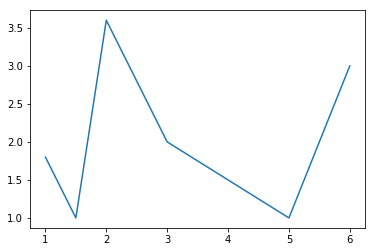

In [3]:
# X и Y - координаты точек
X = [1,   1.5, 2,   3, 5, 6]
Y = [1.8, 1,   3.6, 2, 1, 3]

plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.show()

Можем просто нарисовать точки - **scatterplot**. Кроме того, добавим нашему графику загловок и подписи осей:

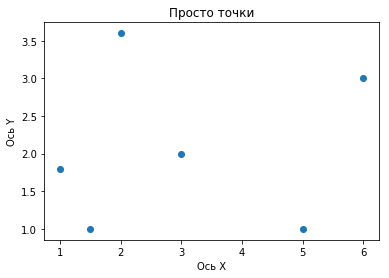

In [3]:
plt.scatter(X,Y)  # рисуем точки
plt.title("Просто точки")
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.show()

С помощью `xlim` и `ylim` можно указать масштаб графика по оси X и Y:

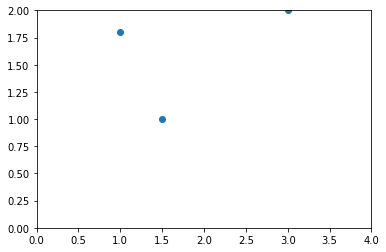

In [22]:
plt.scatter(X, Y)
plt.xlim(0,4)
plt.ylim(0,2)
plt.show()

Когда мы рисуем точки, кроме координат в `plt.scatter()` можно передать параметры:

* `s`: размер точки, по умолчанию 20;
* `c`: цвет, по умолчанию 'b' - голубой;
* `marker`: символ точки, по умолчанию 'o' - круглая точка.


Список поддерживаемых цветов можно посмотреть [тут](https://matplotlib.org/examples/color/named_colors.html), а маркеров - [тут](https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html).

Вот несколько самых популярных маркеров и их обозначений:
* "." – point
* "o" – 	circle
* "v" – 	triangle_down
* "^" – 	triangle_up
* "<" – 	triangle_left
* ">" – 	triangle_right
* "8" – 	octagon
* "s" – 	square
* "p" – 	pentagon
* "P" – 	plus (filled)
* "D" – 	diamond
* "h" – 	hexagon

А вот шпаргалка по цветам (если варианты написаны через /, значит, можно использовать любой):
* 'b' / 'blue'
* 'g' / 'green'
* 'r' / 'red
* 'c' / 'cyan'
* 'm' / 'magenta'
* 'y' / 'yellow'
* 'k' / 'black'
* 'w' / 'white'

Можно использовать более экзотческие цвета вроде 'plum' или 'orchid' из [списка xkcd](https://xkcd.com/color/rgb/), а можно - обозначения цветов в формате RGB/RGBA ('#0F0F0F' и '#0F0F0F0F' соответственно), как в HTML и CSS.

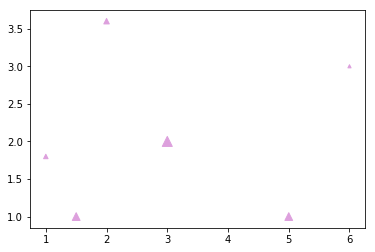

In [10]:
plt.scatter(X, Y, s=[20, 60, 30, 100, 60, 10], c='plum', marker='^')
plt.show()

В качестве **размера и цвета** можно задавать массивы с соответствующими значениями:

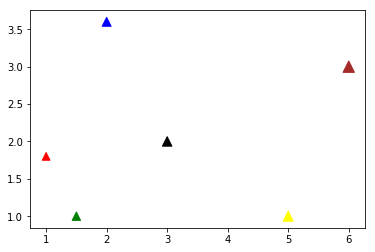

In [31]:
size = [60, 70, 80, 90, 100, 130]
colors = ['red', 'green', 'blue', 'black', 'yellow', 'brown']
plt.scatter(X, Y, s=size, c=colors, marker='^')
plt.show()

А что если хочется для каждой точки использовать свой маркер? Параметр `marker`, в отличие от `c` и `s`, не может быть массивом, так что реализовывать эту идею придется иначе. Проще всего для этого использовать цикл:

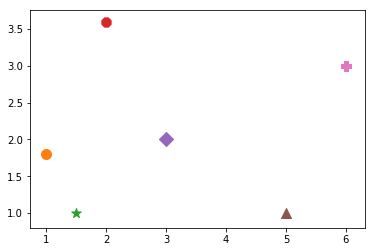

In [26]:
markers = ['o', '*', '8', 'D', '^', 'P']

for x, y, m in zip(X, Y, markers):
    plt.scatter([x],[y], marker=m, s=100)
plt.show()

Можно подписать не только название графика и оси, но и сами точки. Сделать это проще всего тоже в цикле:

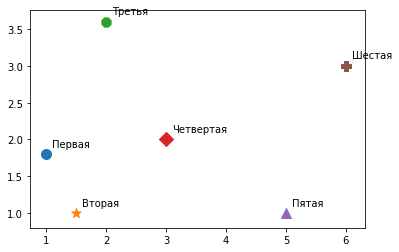

In [32]:
dots = ['Первая', "Вторая", "Третья", "Четвертая", "Пятая", "Шестая"]

for x, y, m, d in zip(X, Y, markers, dots):
    plt.scatter(x, y, marker=m, s=100)
    plt.text(x+0.1, y+0.1, d) # +0.1 - это чтобы текст не наползал на маркер, а отрисовывался чуть выше и правее 
plt.show()

Если хочется нарисовать на одном графике и линию, и точки на одном графике, можно использовать `plot`, а если при этом нужны не все точки, а только определенные, поможет параметр `markevery`.

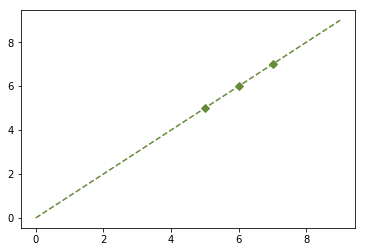

In [18]:
plt.plot(range(10), linestyle='--', marker='D', c='xkcd:moss green', markevery=[5, 6,7])
plt.show()

Можно записать это еще короче:

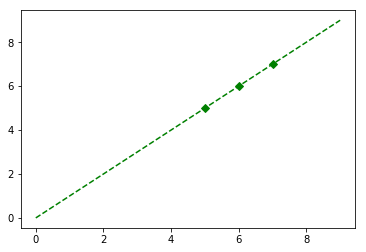

In [19]:
plt.plot(range(10), '--gD', markevery=[5, 6,7])
plt.show()

Естественно, любой график можно сохранить в виде картинки на ваш компьютер в одном из доступных форматов: emf, eps, pdf, png, ps, raw, rgba, svg, svgz.

In [32]:
plt.savefig('plot_with_colors.pdf')

По умолчанию разрешение у картинки довольно маленькое, и если нужно напечатать ее в хорошем качестве - например, в статье - или вывести на сайт в крупном масштабе, то при соханении можно поменять ее разрешение на более высокое с помощью параметра `dpi` (dots per inch). Формат, кстати, тоже можно указать в качестве параметра.

In [ ]:
plt.savefig('plot_with_colors', dpi='300', format='png')

## ggplot

Можно не задавать каждый параметр графика вручную, а использовать готовые стилевые шаблоны для графиков. Одним из популярных шаблонов является `ggplot`. 

Возьмем два набора точек - с координатами (X, Y) и (X2, Y2):

In [35]:
X2 = [i*2 for i in X]
Y2 = [i*1.5 for i in Y]
X3 = [i*0.5 for i in X]
Y3 = [i*0.7 for i in Y]
print(X, Y, X2, Y2)

[1, 1.5, 2, 3, 5, 6] [1.8, 1, 3.6, 2, 1, 3] [2, 3.0, 4, 6, 10, 12] [2.7, 1.5, 5.4, 3.0, 1.5, 4.5]


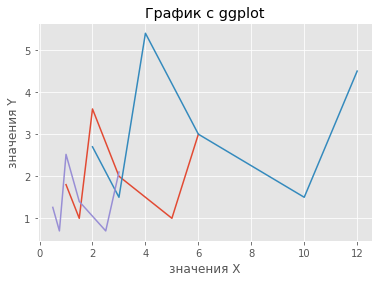

In [36]:
from matplotlib import style  # добавляем стили
style.use('ggplot')  # выбираем стиль ggplot

plt.plot(X,Y)
plt.plot(X2, Y2)
plt.plot(X3, Y3)

plt.title('График с ggplot')
plt.ylabel('значения Y')
plt.xlabel('значения X')

plt.show()

В `plot` так же как в `scatter` выше можно указывать разные параметры. Например, мы можем поменять цвет линии, ее ширину.  

Кроме того мы можем добавить в график легенду. Для этого каждой линии нужно приписать `label`, а затем нарисовать легенду с помощью `legend()`:

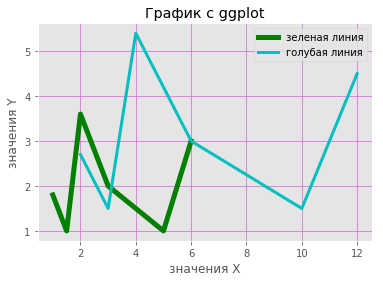

In [37]:
plt.plot(X, Y,'g',label='зеленая линия', linewidth=5)
plt.plot(X2, Y2,'c',label='голубая линия',linewidth=3)

plt.title('График с ggplot')
plt.ylabel('значения Y')
plt.xlabel('значения X')

plt.legend()

plt.grid(True,color='orchid')  # а еще можно менять вид сетки

plt.show()

Соберем новый набор данных:

In [39]:
X = [1, 2, 3, 4, 5]
Y = [11, 12, 13, 14, 15]

X2 = [6, 7, 8, 9, 10]
Y2 = [15, 14, 13, 12, 11]

Мы можем нарисовать __столбчатую диаграмму__:

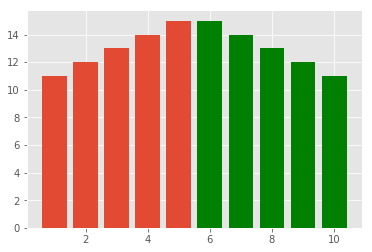

In [40]:
plt.bar(X, Y)
plt.bar(X2, Y2, color='g')
plt.show()

## seaborn

[Seaborn](https://seaborn.pydata.org/) - это библиотека для визуализации графиков с тонкими настройками, которую можно использоватькак отдельно ([вот тут](https://habrahabr.ru/company/ods/blog/323210/) есть хороший тьюториал), так и вместе с matptotlib. Во втором случае нужно просто импортировать ее, а дальше продолжать описывать график в привычном matplotlib'e, но выглядеть он будет совершенно иначе.

Давайте сравним: вот график без seaborn.

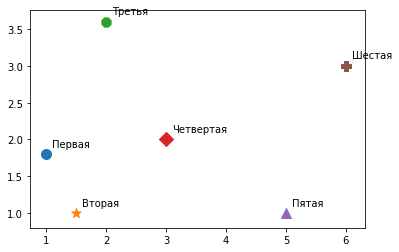

In [33]:
dots = ['Первая', "Вторая", "Третья", "Четвертая", "Пятая", "Шестая"]

for x, y, m, d in zip(X, Y, markers, dots):
    plt.scatter(x, y, marker=m, s=100)
    plt.text(x+0.1, y+0.1, d) # +0.1 -- это чтобы текст не наползал на маркер, а отрисовывался чуть выше и правее 
plt.show()

А вот график с seaborn. Одна строчка меняет все!

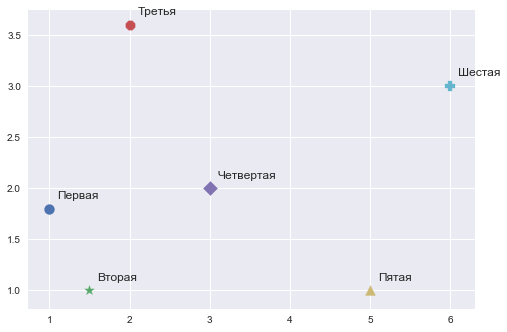

In [34]:
import seaborn

for x, y, m, d in zip(X, Y, markers, dots):
    plt.scatter(x, y, marker=m, s=100)
    plt.text(x+0.1, y+0.1, d) # +0.1 -- это чтобы текст не наползал на маркер, а отрисовывался чуть выше и правее 
plt.show()

## Как читать csv-файлы?

В питоне есть встроенный модуль `csv`, который позволяет читать (csv.reader) и записывать (csv.writer) csv-файлы. Это делается вот так:

In [ ]:
import csv

with open('my_file.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=';', quotechar='|', encoding='utf-8')
    for row in filereader:
        pass # здесь то, что нужно сделать со строками

## Задания

В файле data/nanai-vowels.csv находятся данные для нанайского языка. 7 носителей из двух разных деревень произносили разные слова с гласными i, ɪ (в данных зашифрованознаком I) и ə (в данных зашифровано знаком e). Данные представляют собой автоматически вынутые первую и вторую форманты.

Выведите на графиках средние значения формант каждого звука в зависимости от деревни.